In [43]:
!pip install transformers

Defaulting to user installation because normal site-packages is not writeable
  Using cached PyYAML-6.0.2-cp312-cp312-win_amd64.whl.metadata (2.1 kB)
   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.7 MB 11.2 MB/s eta 0:00:01
   --------------- ------------------------ 3.7/9.7 MB 10.9 MB/s eta 0:00:01
   --------------------------- ------------ 6.6/9.7 MB 11.5 MB/s eta 0:00:01
   ------------------------------------- -- 9.2/9.7 MB 11.9 MB/s eta 0:00:01
   ---------------------------------------- 9.7/9.7 MB 11.6 MB/s eta 0:00:00
Using cached PyYAML-6.0.2-cp312-cp312-win_amd64.whl (156 kB)
   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   -------------------------- ------------- 1.6/2.4 MB 10.5 MB/s eta 0:00:01
   ---------------------------------------- 2.4/2.4 MB 6.8 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [33]:
!pip install textblob

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 4.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 8.0 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [30]:
# !pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [1]:
import pandas as pd

# Load the dataset
file_path = 'dataset/comments.csv'
dataset = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
dataset.head(), dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   no       1000 non-null   int64 
 1   comment  990 non-null    object
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


(   no                                            comment
 0   1  Aku cuma pake sunscreen dan krim ini doang, al...
 1   2  Simpen dulu di keranjang kuning, nanti check out.
 2   3  Muka kusamku jadi segeran setelah rutin pake k...
 3   4  Aku cuma pake sunscreen dan krim ini doang, al...
 4   5  Masih menjadi misteri kenapa Dr. Fay bisa seba...,
 None)

In [10]:
# Cek distribusi panjang komentar
dataset['comment_length'] = dataset['comment'].str.len()
print("\n📏 Distribusi Panjang Komentar:")
print(dataset['comment_length'].describe())


📏 Distribusi Panjang Komentar:
count    990.000000
mean      67.741414
std       26.298239
min       27.000000
25%       49.000000
50%       64.000000
75%       80.000000
max      144.000000
Name: comment_length, dtype: float64


In [12]:
# Cek ringkasan statistik dataset
print(dataset.describe())

       comment_length
count      990.000000
mean        67.741414
std         26.298239
min         27.000000
25%         49.000000
50%         64.000000
75%         80.000000
max        144.000000


In [5]:
# Cek jumlah nilai yang hilang
print(dataset.isnull().sum())


no          0
comment    10
dtype: int64


In [16]:
# Cek jumlah duplikasi
print(dataset.duplicated().sum())

946


In [8]:
# Menghapus kolom yang tidak perlu
dataset.drop(columns=['no'], inplace=True)

In [14]:
print("\n❓ Jumlah Missing Values:")
print(dataset.isnull().sum())

# # Visualisasi missing values
# import seaborn as sns
# sns.heatmap(dataset.isnull(), cbar=False)


❓ Jumlah Missing Values:
comment           10
comment_length    10
dtype: int64


In [15]:
print("\n♻️ Jumlah Duplikat:", dataset.duplicated(subset=['comment']).sum())


♻️ Jumlah Duplikat: 946


In [21]:
cleaned_data = cleaned_data.drop_duplicates(subset=['comment'], keep='first')

In [20]:
# Hapus baris dengan komentar null (10 data)
cleaned_data = dataset.dropna(subset=['comment'])

# Alternatif: Isi dengan placeholder
# cleaned_data['comment'] = dataset['comment'].fillna('[KOSONG]')

In [22]:
# Case folding
cleaned_data['cleaned_comment'] = cleaned_data['comment'].str.lower()

# Remove special characters (sesuaikan dengan kebutuhan)
cleaned_data['cleaned_comment'] = cleaned_data['cleaned_comment'].str.replace(
    r'[^\w\s]', '', regex=True
)

# Remove extra whitespace
cleaned_data['cleaned_comment'] = cleaned_data['cleaned_comment'].str.strip()

In [24]:
print("✅ Shape setelah cleaning:", cleaned_data.shape)
print("✅ Jumlah Missing Values baru:", cleaned_data.isnull().sum())
print("\n📝 Contoh Data Bersih:")
print(cleaned_data[['cleaned_comment']].head(3))

✅ Shape setelah cleaning: (53, 3)
✅ Jumlah Missing Values baru: comment            0
comment_length     0
cleaned_comment    0
dtype: int64

📝 Contoh Data Bersih:
                                     cleaned_comment
0  aku cuma pake sunscreen dan krim ini doang alh...
1    simpen dulu di keranjang kuning nanti check out
2  muka kusamku jadi segeran setelah rutin pake k...


(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

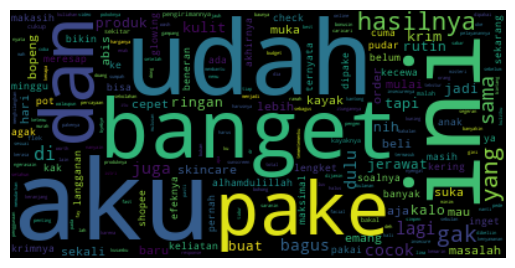

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(cleaned_data['cleaned_comment'])
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [35]:
from textblob import TextBlob
cleaned_data['sentiment'] = cleaned_data['cleaned_comment'].apply(
    lambda x: TextBlob(x).sentiment.polarity
)

In [36]:
cleaned_data.to_csv('cleaned_comments.csv', index=False)

### Give Label to Comment

In [41]:
# Contoh dataframe untuk labeling manual
label_sample = cleaned_data.sample(10, random_state=42)[['cleaned_comment']]
print("📋 Contoh Data untuk Labeling Manual:")
print(label_sample)

📋 Contoh Data untuk Labeling Manual:
                                       cleaned_comment
22                  pakenya gampang cepet meresap lagi
73     cocok untuk berbagai kalangan dan masalah kulit
137  aku juga pake dan cocok kalo jerawat 2 hari aj...
15      ini dia yang aku caricari akhirnya ketemu juga
87   dikira bakal lengket di kulit eh pas dipake te...
6    udah check out kak yang kemarin udah abis dan ...
20            baunya juga enak gak nyengat sama sekali
154                 ini beneran aku udah nyoba sendiri
4    masih menjadi misteri kenapa dr fay bisa sebag...
52   pokoknya bintang lima deh buat produk ini luv ...


In [62]:
# Menggunakan kamus kata positif/negatif Indonesia
positive_words = ['bagus', 'puas', 'recommend', 'seger', 'mantap','bagus','aku', 'saranin', 'kalo']
negative_words = ['jelek', 'mahal', 'rugi', 'kecewa', 'redam']

def rule_based_sentiment(text):
    positive = sum(word in text for word in positive_words)
    negative = sum(word in text for word in negative_words)
    
    if positive > negative:
        return 'positif'
    elif negative > positive:
        return 'negatif'
    else:
        return 'netral'

cleaned_data['sentiment_rule'] = cleaned_data['cleaned_comment'].apply(rule_based_sentiment)

In [63]:
# Menggunakan model IndoBERT untuk sentiment analysis
from transformers import pipeline

# Load model Indonesian sentiment analysis
sentiment_analyzer = pipeline(
    "text-classification",
    model="indolem/indobert-base-uncased",
    tokenizer="indolem/indobert-base-uncased"
)

def predict_sentiment(text):
    result = sentiment_analyzer(text[:512])  # truncate jika terlalu panjang
    return result[0]['label']

cleaned_data['sentiment_ai'] = cleaned_data['cleaned_comment'].apply(predict_sentiment)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use cpu


In [64]:
# Cek konsistensi antara rule-based dan AI
consistency_check = cleaned_data[
    cleaned_data['sentiment_rule'] != cleaned_data['sentiment_ai']
][['cleaned_comment', 'sentiment_rule', 'sentiment_ai']]

print("🔍 Contoh Ketidakonsistenan Label:")
print(consistency_check.head(3))

🔍 Contoh Ketidakonsistenan Label:
                                     cleaned_comment sentiment_rule  \
0  aku cuma pake sunscreen dan krim ini doang alh...         netral   
1    simpen dulu di keranjang kuning nanti check out         netral   
2  muka kusamku jadi segeran setelah rutin pake k...        positif   

  sentiment_ai  
0      LABEL_1  
1      LABEL_0  
2      LABEL_1  


In [65]:
# Contoh handling khusus untuk netral
cleaned_data['final_sentiment'] = cleaned_data['sentiment_ai'].replace({
    'LABEL_0': 'negatif',
    'LABEL_1': 'positif',
    'LABEL_2': 'netral'
})

In [61]:
print("🎯 Contoh Data Berlabel:")
print(cleaned_data[['cleaned_comment', 'final_sentiment']].head(50))

🎯 Contoh Data Berlabel:
                                       cleaned_comment final_sentiment
0    aku cuma pake sunscreen dan krim ini doang alh...         positif
1      simpen dulu di keranjang kuning nanti check out         positif
2    muka kusamku jadi segeran setelah rutin pake k...         negatif
4    masih menjadi misteri kenapa dr fay bisa sebag...         positif
5    banyakin produk kayak gini aku anak kuliahan y...         positif
6    udah check out kak yang kemarin udah abis dan ...         positif
7    aku termasuk orang yang gak percayaan kalo bel...         positif
8    aku juga lagi pake alhamdulillah hasilnya udah...         positif
9                      hasilnya nyata dan bagus banget         positif
11                  di aku cocok banget makasih banyak         positif
12   kak aku udah abis 3 pot nih udah jadi langgana...         positif
13   krimnya ringan gak lengket dan yang penting bi...         positif
15      ini dia yang aku caricari akhirnya ketemu jug